In [14]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = '/hpcstor6/scratch01/s/sanghyuk.kim001'
img_size = (224, 224) # height, width
utilInstance = mel.Util(rootpath, img_size)

directoryPath = rootpath + '/melanomaDB/Kaggle_malignant_benign_DB'

benign_train_img = f'{directoryPath}/train/benign'
malignant_train_img = f'{directoryPath}/train/malignant'
benign_test_img = f'{directoryPath}/test/benign'
malignant_test_img = f'{directoryPath}/test/malignant'

x_train, y_train, x_val, y_val, X_test, Y_test = \
    utilInstance.loadDatasetFromDirectory(benign_train_img, malignant_train_img, benign_test_img, malignant_test_img)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|█████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 647.46it/s]


In [15]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  50,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =  10.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.2, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.2, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = Adam(lr=0.001),
			loss='categorical_crossentropy',
			metrics=['accuracy'],
			callbacks = [red_lr],

			# Postprocessing
			stopper_patience      =  10,   # 0.01; 0.05; 0.1; 0.2;
			run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
base_model = mel.CNN(CFG=CFG)

model = base_model.myresnet50()

history = base_model.fit_model(    
    model = model,
    model_name = 'ResNet50 on Kaggle DB',
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
25/25 [==============================] - 14s 548ms/step - loss: 0.4134 - accuracy: 0.8163 - val_loss: 0.3755 - val_accuracy: 0.8430
Epoch 3/50
25/25 [==============================] - 14s 548ms/step - loss: 0.3788 - accuracy: 0.8296 - val_loss: 0.3434 - val_accuracy: 0.8640
Epoch 4/50
25/25 [==============================] - 14s 553ms/step - loss: 0.3388 - accuracy: 0.8392 - val_loss: 0.3301 - val_accuracy: 0.8560
Epoch 5/50
25/25 [==============================] - 14s 549ms/step - loss: 0.3364 - accuracy: 0.8538 - val_loss: 0.3020 - val_accuracy: 0.8550
Epoch 6/50
25/25 [==============================] - 14s 554ms/step - loss: 0.3147 - accuracy: 0.8570 - val_loss: 0.2987 - val_accuracy: 0.8620

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
Epoch 7/50
25/25 [==============================] - 14s 563ms/step - loss: 0.3029 - accuracy: 0.8570 - val_loss: 0.2872 - val_accuracy: 0.8730
Epoch 8/50
25/25 [==============================] - 14s 558ms

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

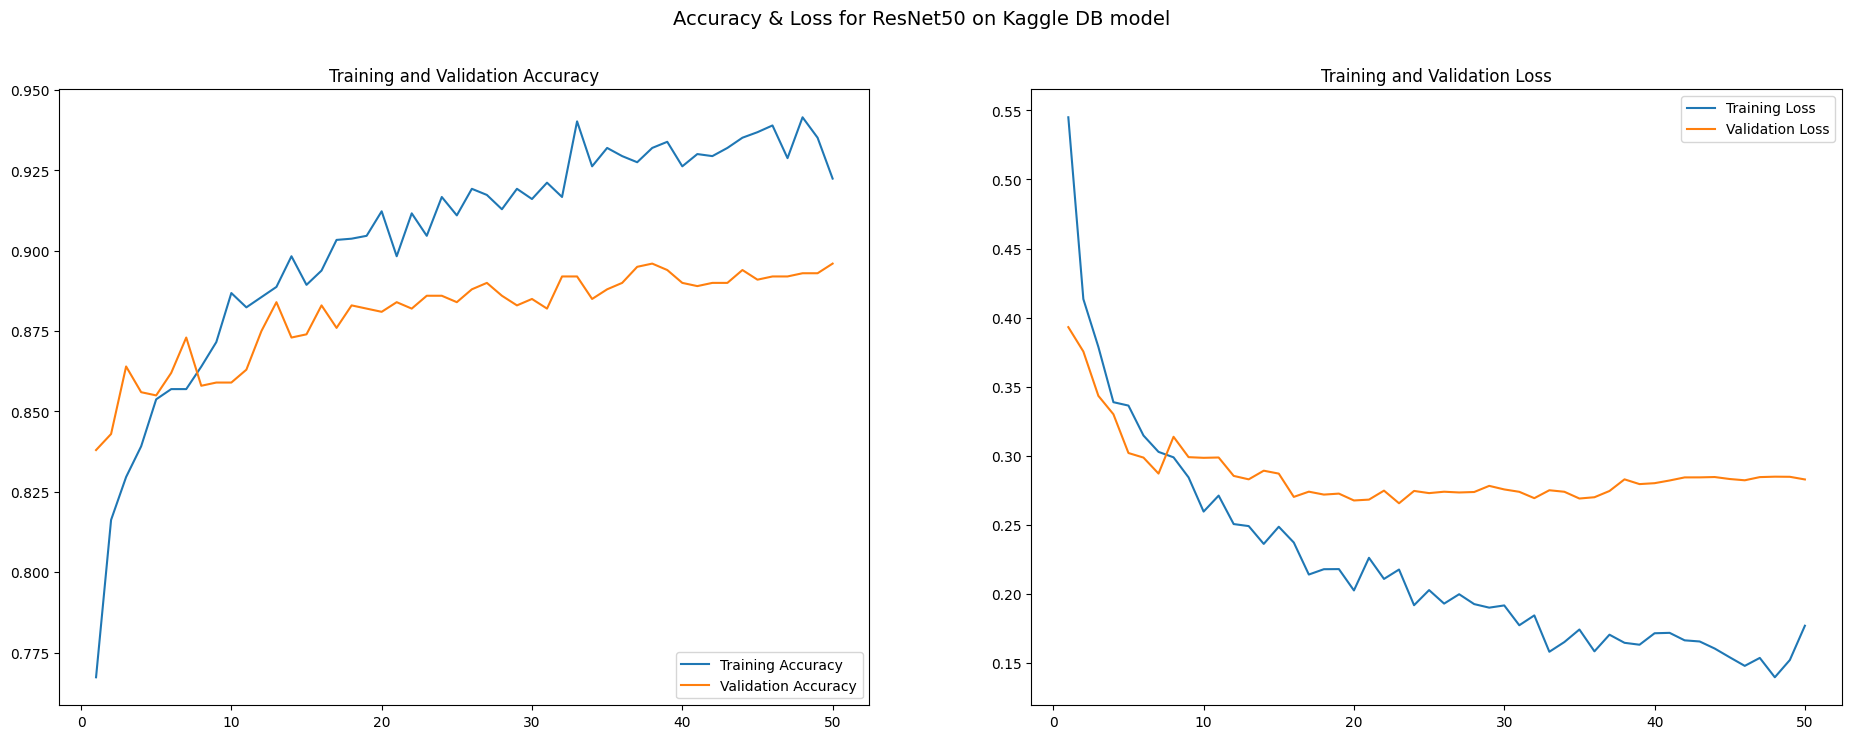

In [17]:
visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = 'ResNet50 on Kaggle DB')

visualizer.visualize_performance(
    model_name = 'ResNet50 on Kaggle DB',
    history = history
)

In [21]:
model_name = 'Kaggle DB trained with ResNet50'
filename = 'ResNet50 on Kaggle DB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

print("Testing on Kaggle DB")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)



# Testing model on test data to evaluate
# from sklearn.metrics import accuracy_score
# lists=[]
# y_pred = model.predict(X_test)
# for i in range(len(y_pred)):
#     if y_pred[i][0]>0.5:
#         lists.append(1)
#     else:
#         lists.append(0)
        
# print(accuracy_score(Y_test, lists))

Testing on Kaggle DB
Evaluating Kaggle DB trained with ResNet50 model...

52/52 [==============================] - 2s 22ms/step - loss: 0.1583 - accuracy: 0.9444
Train loss = 0.15830998122692108  ;  Train accuracy = 94.44%

32/32 [==============================] - 1s 22ms/step - loss: 0.2657 - accuracy: 0.8860
Validation loss = 0.26567062735557556  ;  Validation accuracy = 88.60%

21/21 [==============================] - 0s 22ms/step - loss: 0.2798 - accuracy: 0.8758
Test loss = 0.2798074781894684  ;  Test accuracy = 87.58%
Testing on HAM10000
Evaluating Kaggle DB trained with ResNet50 model...

251/251 [==============================] - 6s 23ms/step - loss: 0.6190 - accuracy: 0.7367
Train loss = 0.6190449595451355  ;  Train accuracy = 73.67%

28/28 [==============================] - 1s 22ms/step - loss: 0.3465 - accuracy: 0.8426
Validation loss = 0.3465399444103241  ;  Validation accuracy = 84.26%

35/35 [==============================] - 1s 25ms/step - loss: 0.3578 - accuracy: 0.8676

In [7]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  200,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =  10.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.2, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.2, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = optimizer2,
			loss='binary_crossentropy',
			metrics=['accuracy'],
			callbacks = [],

			# Postprocessing
			stopper_patience      =  10,   # 0.01; 0.05; 0.1; 0.2;
			run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

base_model = mel.CNN(CFG=CFG)

model = base_model.myresnet50()

history = base_model.fit_model(    
    model = model,
    model_name = 'ResNet50 on Kaggle DB with optimizer2',
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = 'ResNet50 on Kaggle DB with optimizer2')

visualizer.visualize_performance(
    model_name = 'ResNet50 on Kaggle DB with optimizer2',
    history = history
)

# Testing model on test data to evaluate
from sklearn.metrics import accuracy_score
lists=[]
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i][0]>0.5:
        lists.append(1)
    else:
        lists.append(0)
        
print(accuracy_score(Y_test, lists))

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

KeyboardInterrupt: 

In [8]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


img_height = img_size[0]
img_width = img_size[1]
CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  200,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =  10.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.2, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.2, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = Adam(lr=0.001),
			loss='binary_crossentropy',
			metrics=['accuracy'],
			callbacks = [],

			# Postprocessing
			stopper_patience      =  10,   # 0.01; 0.05; 0.1; 0.2;
			run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

test_model = mel.CNN(CFG=CFG)

model_name = 'Kaggle DB test'
filename = 'ResNet50 on HAM10000 self-augmented.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
    testimages = X_test,
    testlabels = Y_test
)

# from tensorflow.keras.models import Model, Sequential, load_model

# model = load_model(modelpath)

# # Testing model on test data to evaluate
# from sklearn.metrics import accuracy_score
# lists=[]
# y_pred = model.predict(X_test)
# for i in range(len(y_pred)):
#     if y_pred[i][0]>0.5:
#         lists.append(1)
#     else:
#         lists.append(0)
        
# print(accuracy_score(Y_test, lists))

Testing on HAM10000
Evaluating Kaggle DB test model...



ValueError: in user code:

    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1323 test_function  *
        return step_function(self, iterator)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1307 run_step  **
        outputs = model.test_step(data)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1268 test_step
        self.compiled_loss(
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:1754 binary_crossentropy
        backend.binary_crossentropy(
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:5023 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/ops/nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 1) vs (None, 2))
